In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd


Améliorations possibles : 
- Prendre un autre représentant que le centroïde du cluster
- Faire un clustering différent
- Trouver des méthodes pour améliorer la complexité

Trucs à faire : 
- Comparaison avec des algos vus en cours (matrix profile, pattern decomposition inverse)
- fine tuning des paramètres ($l_M$ par exemple)
- Etudier l'impact du nombre de tirages

On travaille sur norm-sampl

On le teste en accuracy et en temps et on teste des variantes (on teste des hyperparamètres) 

Comparaison avec des trucs vus en cours (entropy...) 


In [2]:
os.listdir('./data/archive/realKnownCause/realKnownCause')
df=pd.read_csv('./data/archive/realKnownCause/realKnownCause/nyc_taxi.csv')

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
time = np.array(df['timestamp'])

anomalies = NYC marathon (2/11/14), Thanksgiving(27/11/14), Christmas, New Years day, and a snow storm (13-21 11 2014)

In [4]:
len(time)

10320

In [20]:
%matplotlib inline

In [16]:
plt.plot(time , np.array(df['value']))

In [6]:
taxis = np.array(df['value'])

In [37]:
# import adfuller 
from statsmodels.tsa.stattools import adfuller
result_adf = adfuller(taxis)
print("Test de Dickey-Fuller Augmenté")
print(f"Statistique ADF : {result_adf[0]}")
print(f"P-valeur : {result_adf[1]}")
for key, value in result_adf[4].items():
    print(f"Seuil {key} : {value}")

if result_adf[1] < 0.05:
    print("La série est stationnaire (rejette l'hypothèse nulle).")
else:
    print("La série n'est pas stationnaire (ne rejette pas l'hypothèse nulle).")

Test de Dickey-Fuller Augmenté
Statistique ADF : -10.764517454017055
P-valeur : 2.472131722066437e-19
Seuil 1% : -3.4309862775905664
Seuil 5% : -2.8618211976893573
Seuil 10% : -2.566919676386092
La série est stationnaire (rejette l'hypothèse nulle).


In [26]:
from statsmodels.tsa.stattools import adfuller, kpss

result_kpss = kpss(taxis, regression="c")  # 'c' pour une constante, 'ct' pour une constante + tendance
print("\nTest KPSS")
print(f"Statistique KPSS : {result_kpss[0]}")
print(f"P-valeur : {result_kpss[1]}")
for key, value in result_kpss[3].items():
    print(f"Seuil {key} : {value}")

if result_kpss[1] > 0.05:
    print("La série est stationnaire (ne rejette pas l'hypothèse nulle).")
else:
    print("La série n'est pas stationnaire (rejette l'hypothèse nulle).")


Test KPSS
Statistique KPSS : 0.418064394398016
P-valeur : 0.06936879551809655
Seuil 10% : 0.347
Seuil 5% : 0.463
Seuil 2.5% : 0.574
Seuil 1% : 0.739
La série est stationnaire (ne rejette pas l'hypothèse nulle).


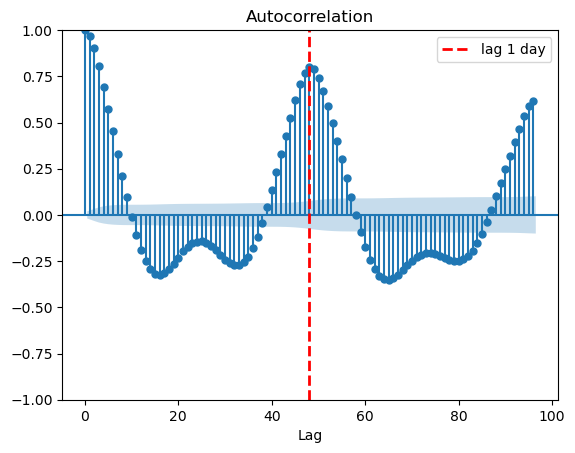

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(taxis, lags=96)
plt.axvline(48, color='red', linestyle='--', lw=2, label='lag 1 day')
plt.legend()
plt.xlabel('Lag')
plt.show()




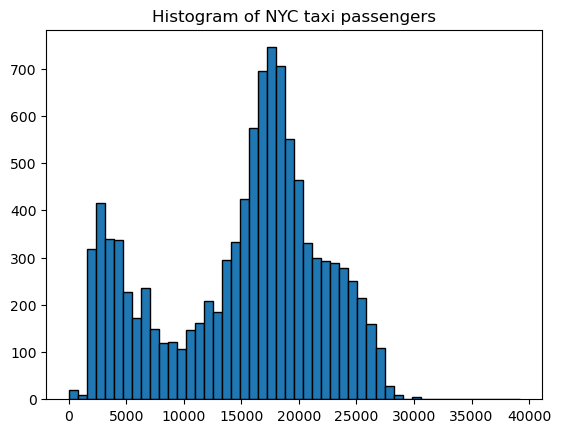

In [34]:
plt.hist(taxis, bins=50, edgecolor='black')
plt.title('Histogram of NYC taxi passengers')
plt.show()

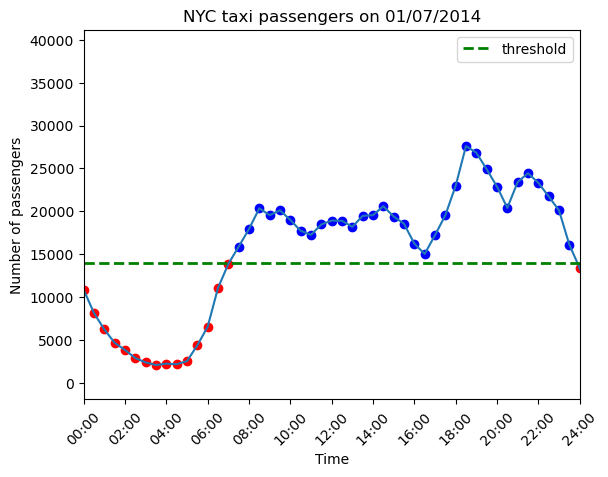

In [72]:
# taxis with points in blue if value is above 14000 and red if below
plt.plot(time, taxis)
plt.scatter(time[taxis > 14000], taxis[taxis > 14000], color='blue')
plt.scatter(time[taxis < 14000], taxis[taxis < 14000], color='red')
plt.title('NYC taxi passengers on 01/07/2014')
plt.xlim(time[0], time[48])
# xticks with hour from 00:00 to 23:00
plt.xticks([time[i] for i in range(0, 49, 4)], [f"{i:02d}:00" for i in range(0, 25, 2)])
# rotation 
plt.xticks(rotation=45)
plt.axhline(14000, color='green', linestyle='--', lw=2, label='threshold')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of passengers')

plt.show()


In [45]:
np.mean(taxis), np.sqrt(np.var(taxis)), len(taxis)

(15137.569379844961, 6939.15958404066, 10320)

In [76]:
%matplotlib qt

In [77]:
plt.plot(taxis)